In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [56]:
df = pd.read_csv('train.csv')
print(df.shape)
df.drop(columns=['RID', 'delivery date', 'placement date', 'address code', 'departure state', 
                 'departure city','class', 'id'], inplace=True)
df.dropna(inplace=True)
df

(6700, 16)


,discount,price,no of items,location,segment,sub-class,delivery type,profit
0,0.2,16.448,2,Central,Consumer,phone,Standard Class,5.5512
1,0.0,29.700,5,Central,Consumer,headset,Standard Class,13.3650
2,0.0,14.730,3,Central,Consumer,shorts,Standard Class,4.8609
3,0.0,43.920,3,Central,Consumer,television,Standard Class,12.7368
4,0.0,66.580,2,Central,Consumer,laptop,Standard Class,15.9792
...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,Consumer,battery,Standard Class,152.0232
6696,0.2,276.784,2,West,Corporate,headset,Standard Class,89.9548
6697,0.0,2.040,1,East,Consumer,watch,Standard Class,0.9588
6698,0.1,207.846,3,East,Corporate,tshirts,Second Class,2.3094


In [57]:
sum = 0
for features in ['location', 'segment', 'sub-class', 'delivery type']:
    print(f'unique items of {features.upper()} ({len(df[features].unique())} items)')
    print(df[features].unique())
    print()
    sum = sum + len(df[features].unique())
print(f'total dummy variables : {sum}')


unique items of LOCATION (4 items)
['Central' 'South' 'West' 'East']

unique items of SEGMENT (3 items)
['Consumer' 'Corporate' 'Home Office']

unique items of SUB-CLASS (17 items)
['phone' 'headset' 'shorts' 'television' 'laptop' 'battery' 'tshirts'
 'watch' 'colddrinks' 'pants' 'lighting' 'hoodies' 'chocolates' 'tablet'
 'charger' 'sweets' 'fastfood']

unique items of DELIVERY TYPE (4 items)
['Standard Class' 'First Class' 'Second Class' 'Same Day']

total dummy variables : 28


### analysis of profit per items

In [58]:
df['ppp'] = df['profit']/df['no of items']
df = df[df['ppp']>0]

In [89]:
df

,discount,price,no of items,location,segment,sub-class,delivery type,profit,ppp
0,0.2,16.448,2,Central,Consumer,phone,Standard Class,5.5512,2.7756
1,0.0,29.700,5,Central,Consumer,headset,Standard Class,13.3650,2.6730
2,0.0,14.730,3,Central,Consumer,shorts,Standard Class,4.8609,1.6203
3,0.0,43.920,3,Central,Consumer,television,Standard Class,12.7368,4.2456
4,0.0,66.580,2,Central,Consumer,laptop,Standard Class,15.9792,7.9896
...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,Consumer,battery,Standard Class,152.0232,50.6744
6696,0.2,276.784,2,West,Corporate,headset,Standard Class,89.9548,44.9774
6697,0.0,2.040,1,East,Consumer,watch,Standard Class,0.9588,0.9588
6698,0.1,207.846,3,East,Corporate,tshirts,Second Class,2.3094,0.7698


<IPython.core.display.Javascript object>


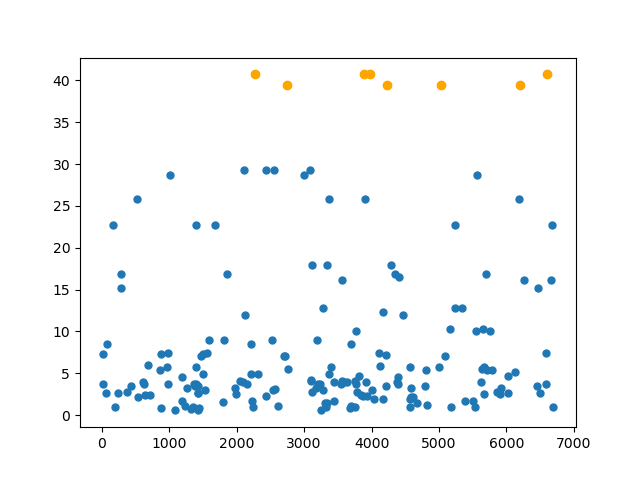

In [206]:
plt.figure()
temp = df[df['sub-class'] == 'watch']

b = df[df['sub-class']=='watch']
c = b[b['ppp']>38.172946]['ppp']

plt.plot(temp['ppp'], 'o', markersize=5)
plt.plot(c, 'o', color='orange', markersize=6)

In [183]:
l = list(df['sub-class'].unique())
l.sort()

th_list = list(grp['threshold'])[0:16]

<IPython.core.display.Javascript object>


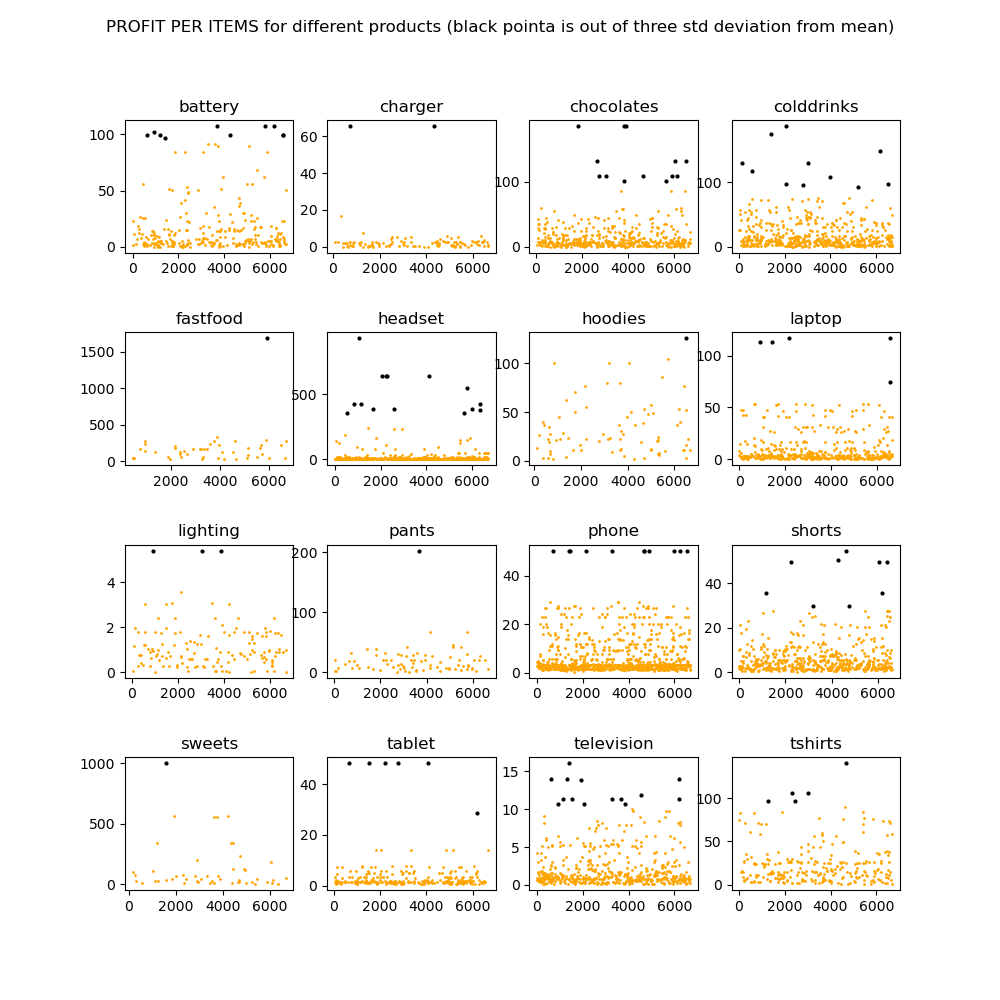

In [224]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0.6) # arguments can be used : hspace=0.4, wspace=0.4

for i, item, threshold in zip(range(1,17), l[0:16], th_list):
    
    temp = df[df['sub-class'] == item]
#     print(item)
#     print(threshold)
#     if(item=='tshirts'):
#         print(temp[temp['ppp']>threshold]['ppp'])
    
    ax = fig.add_subplot(4, 4, i)
    ax.plot(temp['ppp'], 'o', color='orange', markersize=1)
    ax.plot(temp[temp['ppp']>threshold]['ppp'], 'o', color='black', markersize=2)
    ax.set_title(item)
    

fig.suptitle('PROFIT PER ITEMS for different products (black pointa is out of three std deviation from mean)', fontsize=12)
fig.savefig('my_plot.png')

In [121]:
dff = pd.read_csv('train.csv')
dff.drop(columns=['RID', 'delivery date', 'placement date', 'address code', 'departure state', 
                 'departure city','class', 'id'], inplace=True)
dff.dropna(inplace=True)
dff.shape

(6699, 8)

In [123]:
dff.columns

Index(['discount', 'price', 'no of items', 'location', 'segment', 'sub-class',
       'delivery type', 'profit'],
      dtype='object')

In [128]:
dff['sub-class'].value_counts()

headset       1025
phone          912
shorts         641
colddrinks     597
laptop         559
television     513
chocolates     502
tshirts        428
battery        303
tablet         250
hoodies        216
watch          185
lighting       155
pants          152
charger        131
sweets          83
fastfood        47
Name: sub-class, dtype: int64

In [229]:
grp = df.groupby('sub-class').agg(['max', 'min', 'mean', 'std'])['ppp']
grp['threshold'] = grp['mean'] + grp['std']*3
grp

,max,min,mean,std,threshold
sub-class,,,,,
battery,107.3943,0.2088,17.566644,25.058272,92.741459
charger,65.5012,0.0314,3.195720,8.884704,29.849833
chocolates,185.6580,0.1699,16.470908,25.180603,92.012716
colddrinks,187.7970,0.0999,19.552713,23.960955,91.435578
fastfood,1679.9952,29.9990,174.092934,240.130686,894.484993
headset,926.0951,0.4704,21.882365,83.614848,272.726910
hoodies,125.8020,1.4634,33.369259,28.595819,119.156716
laptop,116.4464,0.1358,10.697371,17.053559,61.858047
lighting,5.3956,0.0378,1.145525,0.988935,4.112330


In [225]:
s = 0
for item in grp.index:
    a = df[df['sub-class']==item]
    s = s + len(a[a['ppp']>grp.loc[item,'threshold']])
print(s)

116


### analysis with price per items

In [226]:
df.head(10)

,discount,price,no of items,location,segment,sub-class,delivery type,profit,ppp
0,0.2,16.448,2,Central,Consumer,phone,Standard Class,5.5512,2.7756
1,0.0,29.700,5,Central,Consumer,headset,Standard Class,13.3650,2.6730
2,0.0,14.730,3,Central,Consumer,shorts,Standard Class,4.8609,1.6203
3,0.0,43.920,3,Central,Consumer,television,Standard Class,12.7368,4.2456
4,0.0,66.580,2,Central,Consumer,laptop,Standard Class,15.9792,7.9896
5,0.1,247.716,4,Central,Consumer,battery,Standard Class,93.5816,23.3954
6,0.0,19.050,5,Central,Consumer,headset,Standard Class,8.9535,1.7907
7,0.0,272.940,3,Central,Consumer,shorts,Standard Class,30.0234,10.0078
9,0.0,13.980,1,Central,Consumer,laptop,Standard Class,4.0542,4.0542
10,0.0,1067.940,3,South,Consumer,tshirts,Standard Class,224.2674,74.7558


In [240]:
pp = df[['price', 'no of items', 'sub-class']]
pp['ppi'] = pp['price']/pp['no of items']
pp.head(8)

C:\Users\User\.conda\envs\AntonioEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price,no of items,sub-class,ppi
0,16.448,2,phone,8.224
1,29.700,5,headset,5.940
2,14.730,3,shorts,4.910
3,43.920,3,television,14.640
4,66.580,2,laptop,33.290
5,247.716,4,battery,61.929
6,19.050,5,headset,3.810
7,272.940,3,shorts,90.980


In [255]:
df['sub-class'].unique()

array(['phone', 'headset', 'shorts', 'television', 'laptop', 'battery',
       'tshirts', 'watch', 'colddrinks', 'pants', 'chocolates',
       'lighting', 'tablet', 'charger', 'hoodies', 'sweets', 'fastfood'],
      dtype=object)

count     616.000000
mean       52.936484
std       189.980400
min         1.344000
25%         4.464000
50%         7.695000
75%        18.940000
max      1889.990000
Name: ppi, dtype: float64

In [273]:
s = 0
for item in df['sub-class'].unique():
    g = pp.groupby('sub-class')
    pr = g.get_group(item)
    pr['ppi'].describe()
    mean = list(pr['ppi'].describe())[1]
    std = list(pr['ppi'].describe())[2]
    th = mean + 4*std
    print(f'mean value of {item.upper()} : {mean}')
    s = s + len(pr[pr['ppi']>th])
print(s)

mean value of PHONE : 15.276462719298246
mean value of HEADSET : 52.93648376623376
mean value of SHORTS : 26.29353191489362
mean value of TELEVISION : 9.223157894736843
mean value of LAPTOP : 72.92790846681923
mean value of BATTERY : 68.11184410646386
mean value of TSHIRTS : 155.65636679536678
mean value of WATCH : 20.24294054054054
mean value of COLDDRINKS : 107.38653438113948
mean value of PANTS : 147.799575
mean value of CHOCOLATES : 59.292831050228315
mean value of LIGHTING : 3.3097000000000003
mean value of TABLET : 8.534367999999999
mean value of CHARGER : 54.59775700934579
mean value of HOODIES : 214.99784810126584
mean value of SWEETS : 434.79112000000003
mean value of FASTFOOD : 505.7362978723405
57


In [276]:
# print(f'mean value of {item.upper()} : {mean}')
# (pr[pr['ppi']>th])
list(df.columns)

['discount',
 'price',
 'no of items',
 'location',
 'segment',
 'sub-class',
 'delivery type',
 'profit',
 'ppp']

### preprocessing for train and test 3

In [278]:
df.columns = ['discount','price','no of items','location','segment','sub-class','delivery type',
              'profit','ppi']
df['ppi'] = df['price']/df['no of items']

C:\Users\User\.conda\envs\AntonioEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [279]:
df

,discount,price,no of items,location,segment,sub-class,delivery type,profit,ppi
0,0.2,16.448,2,Central,Consumer,phone,Standard Class,5.5512,8.224
1,0.0,29.700,5,Central,Consumer,headset,Standard Class,13.3650,5.940
2,0.0,14.730,3,Central,Consumer,shorts,Standard Class,4.8609,4.910
3,0.0,43.920,3,Central,Consumer,television,Standard Class,12.7368,14.640
4,0.0,66.580,2,Central,Consumer,laptop,Standard Class,15.9792,33.290
...,...,...,...,...,...,...,...,...,...
6695,0.0,542.940,3,East,Consumer,battery,Standard Class,152.0232,180.980
6696,0.2,276.784,2,West,Corporate,headset,Standard Class,89.9548,138.392
6697,0.0,2.040,1,East,Consumer,watch,Standard Class,0.9588,2.040
6698,0.1,207.846,3,East,Corporate,tshirts,Second Class,2.3094,69.282


In [280]:
df['ppi'].describe()

count    5402.000000
mean       59.625319
std       135.721269
min         0.792000
25%         5.800000
50%        15.930000
75%        55.992000
max      3499.990000
Name: ppi, dtype: float64

In [294]:
phone = df.groupby('location').get_group('Central').groupby('sub-class').get_group('phone')
phone

,discount,price,no of items,location,segment,sub-class,delivery type,profit,ppi
0,0.2,16.448,2,Central,Consumer,phone,Standard Class,5.5512,8.224
23,0.0,10.560,2,Central,Consumer,phone,Standard Class,4.7520,5.280
83,0.2,16.176,3,Central,Consumer,phone,Second Class,6.0660,5.392
204,0.2,5.184,1,Central,Consumer,phone,Same Day,1.8792,5.184
228,0.2,17.472,3,Central,Home Office,phone,Standard Class,5.6784,5.824
...,...,...,...,...,...,...,...,...,...
6519,0.2,30.816,9,Central,Corporate,phone,Second Class,9.6300,3.424
6558,0.0,23.920,4,Central,Consumer,phone,Second Class,11.7208,5.980
6561,0.0,13.760,2,Central,Consumer,phone,Standard Class,6.3296,6.880
6562,0.0,33.360,4,Central,Consumer,phone,Standard Class,16.6800,8.340


In [297]:
phone2 = df.groupby('location').get_group('East').groupby('sub-class').get_group('phone')
phone2

,discount,price,no of items,location,segment,sub-class,delivery type,profit,ppi
69,0.2,37.408,7,East,Consumer,phone,Standard Class,13.0928,5.344
148,0.2,126.624,6,East,Corporate,phone,Second Class,41.1528,21.104
186,0.0,24.900,5,East,Consumer,phone,Standard Class,11.7030,4.980
214,0.0,97.820,2,East,Consumer,phone,Second Class,45.9754,48.910
236,0.0,36.400,5,East,Home Office,phone,Standard Class,17.4720,7.280
...,...,...,...,...,...,...,...,...,...
6545,0.0,54.960,1,East,Consumer,phone,Standard Class,26.9304,54.960
6591,0.0,6.480,1,East,Home Office,phone,Standard Class,3.1104,6.480
6592,0.0,62.820,9,East,Corporate,phone,Standard Class,29.5254,6.980
6594,0.0,18.540,2,East,Consumer,phone,Standard Class,8.7138,9.270


In [298]:
print(phone.describe())
print(phone2.describe())

         discount       price  no of items      profit         ppi
count  212.000000  212.000000   212.000000  212.000000  212.000000
mean     0.128302   53.097274     3.820755   21.227927   13.601236
std      0.096138   81.465393     2.329685   34.653603   17.551407
min      0.000000    3.528000     1.000000    1.146600    2.384000
25%      0.000000   12.960000     2.000000    5.177250    5.184000
50%      0.200000   23.320000     3.000000    9.341600    5.875000
75%      0.200000   51.840000     5.000000   20.087100   11.575000
max      0.200000  629.100000    13.000000  301.968000  104.850000
         discount       price  no of items      profit         ppi
count  241.000000  241.000000   241.000000  241.000000  241.000000
mean     0.061411   53.157452     3.800830   23.622156   14.839925
std      0.092446   65.543641     2.255031   29.206032   16.224255
min      0.000000    3.380000     1.000000    1.070000    2.512000
25%      0.000000   14.940000     2.000000    6.220800    5.18

In [300]:
df['discount'].value_counts()

0.00    3198
0.20    2093
0.10      66
0.15      24
0.40      16
0.30       5
Name: discount, dtype: int64